In [1]:
import numpy as np

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

In [3]:
t = [0, 1, 0]
y = [.1, .7, .3]
mean_squared_error(np.array(y), np.array(t))


0.09500000000000001

In [4]:
y = [.9, .1, .1]
mean_squared_error(np.array(y), np.array(t))

0.8150000000000001

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
y = [.1, .7, .3]
cross_entropy_error(np.array(y), np.array(t))


0.3566748010815999

In [7]:
y = [.9, .1, .1]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [8]:
import sys, os
sys.path.append(os.pardir)
from CHAPTER03.mnist import load_mnist

In [9]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

In [10]:
print(x_train.shape)

(60000, 784)


In [11]:
y_train.shape

(60000, 10)

In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]
print(x_batch)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
batch_mask[0]

50171

In [14]:
batch_mask

array([50171, 45445, 46311, 41372,  2171,  4149, 20109, 53918, 13763,
        4153])

In [15]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [17]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [18]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [19]:
print(10 ** -4)

0.0001


In [20]:
np.float32(1e-3)

0.001

In [21]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [22]:
def func_1(x):
    return 0.01 * x ** 2 + 0.1 * x

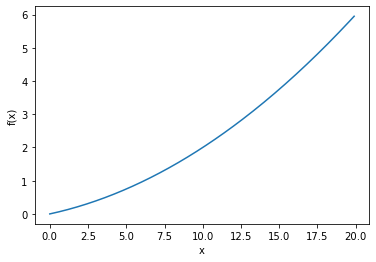

In [23]:
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [24]:
numerical_diff(func_1, 5)

0.1999999999990898

In [25]:
numerical_diff(func_1, 10)

0.2999999999986347

In [26]:
def func_2(x):
    return x[0]**2 + x[1]**2

In [27]:
def func_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [28]:
def func_tmp2(x1):
    return x1*x1 + 3.0**2.0
numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [29]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
        
    return grad

In [30]:
numerical_gradient(func_2, np.array([3., 4]))

array([6., 8.])

In [31]:
numerical_gradient(func_2, np.array([0, 2.]))

array([0., 4.])

In [32]:
numerical_gradient(func_2, np.array([3., 0]))

array([6., 0.])

In [33]:
def numerical_gradient_(f, X):
    if X.ndim == 1:
        return numerical_gradient(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient(f, x)
        
        return grad


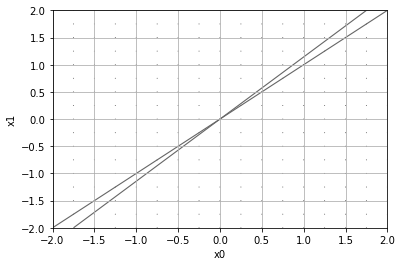

In [34]:

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient_(func_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

No handles with labels found to put in legend.


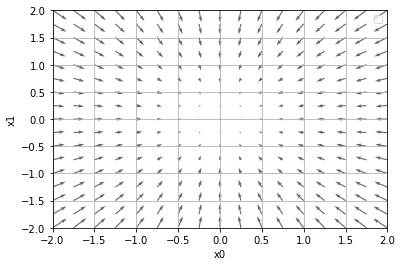

In [35]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [36]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [37]:
init_x = np.array([-3., 4.])
gradient_descent(func_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [38]:
init_x = np.array([-3., 4.])
gradient_descent(func_2, init_x=init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [39]:
init_x = np.array([-3., 4.])
gradient_descent(func_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [40]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [41]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [42]:
net = simpleNet()
print(net.W)

[[-0.28366927  0.78451088 -0.90839378]
 [-0.68912753 -0.24236179  0.61157114]]


In [43]:
x = np.array([.6, .9])
p = net.predict(x)
print(p)

[-0.79041634  0.25258091  0.00537776]


In [44]:
np.argmax(p)

1

In [45]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.0049099402177954

In [46]:
def f(W):
    return net.loss(x, t)

In [47]:
dw = numerical_gradient(f, net.W)
print(dw)

[[ 0.09910948  0.28124392 -0.38035339]
 [ 0.14866422  0.42186588 -0.57053009]]


In [48]:
f = lambda w: net.loss(x, t)
dw = numerical_gradient(f, net.W)
print(dw)

[[ 0.09910948  0.28124392 -0.38035339]
 [ 0.14866422  0.42186588 -0.57053009]]


In [59]:
from common.functions import *
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [60]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [61]:
x = np.random.randn(100, 784)
y = net.predict(x)

In [62]:
import numpy as np
from dataset.mnist import load_mnist

In [63]:
(x_train, y_train), (x_test, y_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [64]:
# for i in range(iters_num):
#     batch_mask = np.random.choice(train_size, batch_size)# 
#     x_batch = x_train[batch_mask]
#     y_batch = y_train[batch_mask]
#     
#     grad = network.numerical_gradient(x_batch, y_batch)
#     
#     for key in ('W1', 'b1', 'W2', 'b2'):
#         network.params[key] -= learning_rate * grad[key]
#         
#     loss = network.loss(x_batch, y_batch)
#     train_loss_list.append(loss)

In [65]:
(x_train, y_train), (x_test, y_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, y_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
             + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.07056666666666667, 0.0694


KeyboardInterrupt: 